In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

# Dimensionality reduction with PCA

In [2]:
import scipy.io as sio
data_path = 'ex7data1.mat'
data = sio.loadmat(data_path)
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X'])


(50, 2)


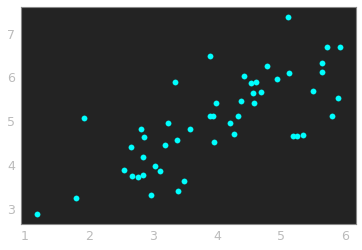

In [6]:
plt.rcParams['axes.grid'] = False
X = data['X']
plt.scatter(X[:,0], X[:,1], c="cyan")
print(X.shape)
plt.show()

In [44]:
def feature_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, ddof=1, axis=0)
    X_norm = (X - mu)/sigma
    
    return X_norm, mu, sigma

In [45]:
def pca(X):
    # computing the covariance matrix
    sigma = (X.T @ X)/X.shape[0]
    U, S, X = np.linalg.svd(sigma)
    return U, S

In [46]:
X_norm, mu, _ = feature_normalize(X)
U, S = pca(X_norm)

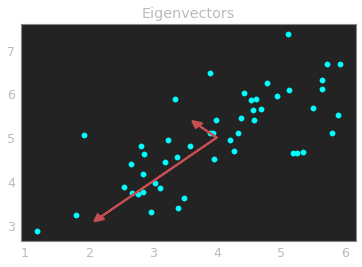

In [81]:
plt.title("Eigenvectors")
plt.scatter(X[:,0], X[:,1], c="cyan")
# plt.plot([mu[0], mu[0] + 1.5*S[1] * U[0,1]], [mu[1], mu[1] + 1.5*S[1] * U[1,1]], c="red")
# plt.plot([mu[0], mu[0] + 1.5*S[0] * U[0,0]], [mu[1], mu[1] + 1.5*S[0] * U[1,0]], c="white")
for i in range(2):
    plt.arrow(mu[0], mu[1], 1.5 * S[i]*U[0, i], 1.5 * S[i]*U[1, i],
             head_width=0.15, head_length=0.15, fc='r', ec='r', lw=2, zorder=1000)
plt.show()

In [108]:
def project_data(X, U, K):
    U_reduce = U[:,:K]
    return X @ U_reduce 

def recover_data(Z, U, K):
    return Z @ U[:,:K].T

In [113]:
K = 1
Z = project_data(X_norm, U, K)
print('Projection of the first example:\n', Z[0])
X_rec  = recover_data(Z, U, K)
print("Original first example:\n", X_norm[0])
print('Approximation of the first example:\n', X_rec[0])

Projection of the first example:
 [1.48127391]
Original first example:
 [-0.5180535  -1.57678415]
Approximation of the first example:
 [-1.04741883 -1.04741883]


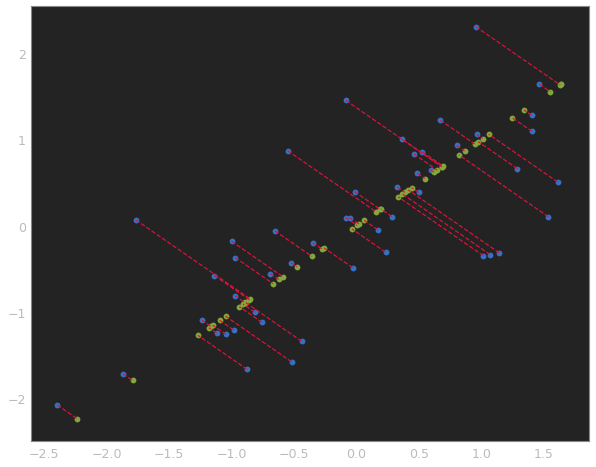

In [125]:
plt.figure(figsize=(10,8))
plt.scatter(X_norm[:, 0], X_norm[:, 1])
plt.scatter(X_rec[:, 0], X_rec[:, 1])
for i in range(X_norm.shape[0]):
      plt.plot([X_norm[i,0], X_rec[i,0]], [X_norm[i,1], X_rec[i,1]], "--", c="crimson")
plt.show()

# Face dataset

In [190]:
import scipy.io as sio
data_path = 'ex7faces.mat'
face_data = sio.loadmat(data_path)
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X'])


In [214]:
def display_data(data, width, fig_size=(5,5)):
    plt.figure(figsize=fig_size)
    height = data.shape[0] / width
    for i, im_data in enumerate(data):
        plt.subplot(height, width, i+1)
        plt.axis('off')
        image = data[i].reshape((32, 32), order='F') #order like in fortran, nice
        plt.imshow(image,'gray')
    plt.tight_layout(pad=0.1)
    plt.show()

(5000, 1024)


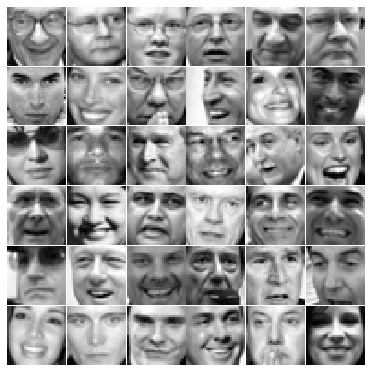

In [215]:
X_faces = face_data['X']
print(X_faces.shape)
display_data(X_faces[:36], 6)

In [216]:
X_norm, _, _ = feature_normalize(X_faces)
U, _ = pca(X_norm)
U.shape

(1024, 1024)

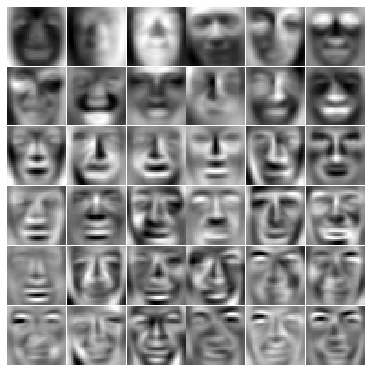

In [217]:
U = U.T 
display_data(U[:36], 6)

In [218]:
K = 100
Z = project_data(X_norm, U.T, K)
print('Each face image is now described by a vector Z. Z has a size of: ', Z.shape)
X_rec  = recover_data(Z, U.T, K)
X_rec.shape

Each face image is now described by a vector Z. Z has a size of:  (5000, 100)


(5000, 1024)

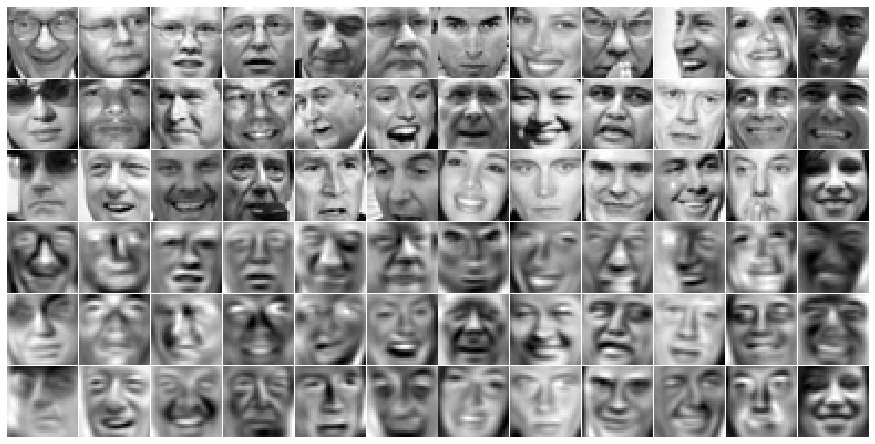

In [220]:
display_data(np.vstack((X_faces[:36], X_rec[:36])), 12, (12,6))